# Dynamic Analysis

### Selected Windows API sequence

The example below is a malware called 'Delf'

It md5 is 0c494687e1a01a7e3eefc541f0a91d50.

如果船HTTP buffer 上限是4000 byte ，但我傳5000的byte給對方的server，這樣就會ｏｖｅｒｆｌｏｗ，對方記憶體爆掉

In [2]:
!wget https://drive.google.com/uc?id=1xEgAkeGKJksjxZIFRbOB3gLWta9Q83ea -O 0c4946_3140.hooklog

--2020-04-17 17:43:06--  https://drive.google.com/uc?id=1xEgAkeGKJksjxZIFRbOB3gLWta9Q83ea
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.100, 172.217.204.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mbl5e2plet0jkube34idml33p1s8gvvk/1587145350000/17174434063503717705/*/1xEgAkeGKJksjxZIFRbOB3gLWta9Q83ea [following]
--2020-04-17 17:43:06--  https://doc-0o-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mbl5e2plet0jkube34idml33p1s8gvvk/1587145350000/17174434063503717705/*/1xEgAkeGKJksjxZIFRbOB3gLWta9Q83ea
Resolving doc-0o-38-docs.googleusercontent.com (doc-0o-38-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0o-38-docs.googleusercontent.com (doc-0o-38-docs.googleusercontent.com)|1

惡意程式相容程度越高（越不需要別人安裝什麼程式）越可以感染其他電腦
static linked ，這支程式所用到的所有libraries都寫在這支程式裡面，
程式執行起來才去作業系統找libraries import 進來 dynamic link

In [3]:
!head -21 0c4946_3140.hooklog

#3140 是錄製的process id 
#後面是時間 是秒數，是可以排序的 在 224300000時間點下去load library
#lpFileName=C:\WINDOWS\system32\IMM32.DLL 是 loadlibrary的參數
#若load function是成功的 Return
# 撈幾碼 windows幾碼是他掌控整個她在wineows想掌控的hKey=HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\Session Manager\CriticalSectionTimeout


3140 malware.exe
#223510000
LoadLibrary
lpFileName=C:\WINDOWS\system32\IMM32.DLL
Return=SUCCESS
#224300000
LoadLibrary
lpFileName=gdi32.dll
Return=SUCCESS
#224010000
LoadLibrary
lpFileName=LPK.DLL
Return=SUCCESS
#224770000
RegQueryValue
hKey=HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\Session Manager\CriticalSectionTimeout
Return=0
#224770000
RegQueryValue
hKey=HKEY_LOCAL_MACHINE\Software\Microsoft\Ole\RWLockResourceTimeOut
Return=2


### Windows API call sequence

The example below is a malware called 'LoadMoney'.

It md5 is 0006dfb19193ff5910b3ffc94a29a7f6.

In [4]:
!wget https://drive.google.com/uc?id=1u1YoQPsKc8HRD0KDGbQwoQlMgU1lE9G9 -O 0006df_1416.trace

--2020-04-17 17:43:13--  https://drive.google.com/uc?id=1u1YoQPsKc8HRD0KDGbQwoQlMgU1lE9G9
Resolving drive.google.com (drive.google.com)... 173.194.216.100, 173.194.216.101, 173.194.216.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tiao0mpqvcks5j4tdta7bbtdaepa42br/1587145350000/17174434063503717705/*/1u1YoQPsKc8HRD0KDGbQwoQlMgU1lE9G9 [following]
--2020-04-17 17:43:14--  https://doc-14-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tiao0mpqvcks5j4tdta7bbtdaepa42br/1587145350000/17174434063503717705/*/1u1YoQPsKc8HRD0KDGbQwoQlMgU1lE9G9
Resolving doc-14-38-docs.googleusercontent.com (doc-14-38-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-14-38-docs.googleusercontent.com (doc-14-38-docs.googleusercontent.com)|1

In [5]:
!head -10 0006df_1416.trace  #EIP 是return value , TId process id 

Process 1416 TID: 1420 -> ntdll.dll::RtlAppendUnicodeToString @ EIP: 0x7c914f1a
Process 1416 TID: 1420 -> ntdll.dll::RtlInitUnicodeString @ EIP: 0x7c901295
Process 1416 TID: 1420 -> ntdll.dll::memmove @ EIP: 0x7c9020f5
Process 1416 TID: 1420 -> ntdll.dll::RtlAppendUnicodeStringToString @ EIP: 0x7c914f8f
Process 1416 TID: 1420 -> ntdll.dll::memmove @ EIP: 0x7c9020f5
Process 1416 TID: 1420 -> ntdll.dll::ZwOpenKey @ EIP: 0x7c90d5b0
Process 1416 TID: 1420 -> ntdll.dll::KiFastSystemCall @ EIP: 0x7c90e4f0
Process 1416 TID: 1420 -> ntdll.dll::KiFastSystemCallRet @ EIP: 0x7c90e4f4
Process 1416 TID: 1420 -> ntdll.dll::RtlImageDirectoryEntryToData @ EIP: 0x7c910326
Process 1416 TID: 1420 -> ntdll.dll::RtlTryEnterCriticalSection @ EIP: 0x7c901118


### Android DDMS profile


In [6]:
!wget https://drive.google.com/uc?id=1Xf52XbZVk01xbT6GakF6_qc_tgdwAh1f -O 385f.txt

--2020-04-17 17:43:19--  https://drive.google.com/uc?id=1Xf52XbZVk01xbT6GakF6_qc_tgdwAh1f
Resolving drive.google.com (drive.google.com)... 173.194.216.100, 173.194.216.139, 173.194.216.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bk1hu5lcc63e2b7oijeijer41eple5ae/1587145350000/17174434063503717705/*/1Xf52XbZVk01xbT6GakF6_qc_tgdwAh1f [following]
--2020-04-17 17:43:20--  https://doc-14-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bk1hu5lcc63e2b7oijeijer41eple5ae/1587145350000/17174434063503717705/*/1Xf52XbZVk01xbT6GakF6_qc_tgdwAh1f
Resolving doc-14-38-docs.googleusercontent.com (doc-14-38-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-14-38-docs.googleusercontent.com (doc-14-38-docs.googleusercontent.com)|1

In [7]:
!head -21 385f.txt  #17個thread 但都隸屬同一個process

VERSION: 3
Threads (17):
 1 main
 2 GC
 3 Signal Catcher
 4 JDWP
 5 Compiler
 6 ReferenceQueueDaemon
 7 FinalizerDaemon
 8 FinalizerWatchdogDaemon
 9 Binder_1
10 Binder_2
11 Thread-90
12 Thread-91
13 Thread-92
14 CleanupReference
15 Timer-0
16 Thread-100
17 OkHttp ConnectionPool
Trace (threadID action usecs class.method signature):
 4 xit         0 ..dalvik/system/VMDebug.startMethodTracingDdms (IIZI)V


In [8]:
!head -40 385f.txt | tail -20

 4 xit         0 ..dalvik/system/VMDebug.startMethodTracingDdms (IIZI)V
 4 xit         2 .android/os/Debug.startMethodTracingDdms (IIZI)V
 4 xit         4 android/ddm/DdmHandleProfiling.handleMPSS (Lorg/apache/harmony/dalvik/ddmc/Chunk;)Lorg/apache/harmony/dalvik/ddmc/Chunk;
 4 xit         5-android/ddm/DdmHandleProfiling.handleChunk (Lorg/apache/harmony/dalvik/ddmc/Chunk;)Lorg/apache/harmony/dalvik/ddmc/Chunk;
 4 xit         6-org/apache/harmony/dalvik/ddmc/DdmServer.dispatch (I[BII)Lorg/apache/harmony/dalvik/ddmc/Chunk;
 4 ent        53-org/apache/harmony/dalvik/ddmc/DdmServer.dispatch (I[BII)Lorg/apache/harmony/dalvik/ddmc/Chunk;
 4 ent        58-java/lang/Integer.valueOf (I)Ljava/lang/Integer;
 4 ent        62 java/lang/Integer.<init> (I)V
 4 ent        63 .java/lang/Number.<init> ()V
 4 xit        65 .java/lang/Number.<init> ()V
 4 xit        66 java/lang/Integer.<init> (I)V
 4 xit        67-java/lang/Integer.valueOf (I)Ljava/lang/Integer;
 4 ent        68-java/util/HashMap.get (L

# Parser

### hooklog (selected WinAPI)

In [0]:
import os

class Hooklog(object):
  filepathname = None
  par = None
  
  digitname = None
  length = None
  li = None

  def __init__(self, filepathname, par = False):
    self.filepathname = filepathname
    self.par = par
    self.li = list()
    self.length = 0
    
    assert filepathname != ""
    self._parseDigitName()
    self._parseHooklog()
  
  def __len__(self):
    return self.length
  
  def __iter__(self):
    return iter(self.li)
  
  def __str__(self):
    return "class Hooklog: %s, par = %s, len = %d, digit name = %s" % (self.filepathname, self.par, self.length, self.digitname)
  
  def _parseDigitName(self):
    self.digitname = self.filepathname.split('/')[-1][0:6] + '-' + self.filepathname.split('_')[-1].split('.')[0]
    
  def _parseHooklog(self):
    if os.path.isfile(self.filepathname):
      handle = open(self.filepathname, "rb")
      
      while True:
        tick, api, pars = self._getNextPair(handle)
        if tick == 0:
          break
        if self.par:
          self.li.append((tick, api, pars))
        else:
          self.li.append((tick, api))
        self.length += 1
      if handle:
        handle.close()
        
      self.li.sort(key = lambda tup: tup[0]) # sort by tick
      
    else:
      print("file not exist!")
      raise
      
  def _getNextPair(self, handle):
    tick = 0
    api = ''
    pars = None
    
    while True:
      line = handle.readline().decode("windows-1252")
      if not line:
        break # eof
      if line[0] == '#': # a new call
        tick = line[1:].strip()
        api = handle.readline().decode("windows-1252").strip() # next line
        api = api[1:] if api[0] == '=' else api # remove '='
        
        if self.par == True:
          pars = self._getParValue(api, handle)
        break
      else:
        continue
    return tick, api, pars
  
  def _getParValue(self, api, handle):
    firstpar = handle.readline().decode("windows-1252").strip()
    return firstpar
  
  def getAPISet(self, gram = 1):
    _set = set()
    for i in range(self.length - gram + 1):
      key = ''
      for g in range(gram):
        key += self.li[i+g][1] # api
      _set.add(key)
    return _set

In [0]:
try:
  hl = Hooklog("/content/0c4946_3140.hooklog")
except:
  print("Error")

In [33]:
print(hl)

#try this
for call in hl:
 print(call)

class Hooklog: /content/morstar/f9449d87262a5016f0993d99_1948.trace.hooklog, par = False, len = 1214, digit name = f9449d-1948
('357910000', 'CreateFile')
('358220000', 'RegQueryValue')
('358250000', 'RegQueryValue')
('358570000', 'RegQueryValue')
('358900000', 'LoadLibrary')
('358980000', 'LoadLibrary')
('359260000', 'RegQueryValue')
('359270000', 'RegQueryValue')
('360730000', 'LoadLibrary')
('360890000', 'RegQueryValue')
('360970000', 'RegQueryValue')
('360980000', 'RegQueryValue')
('360980000', 'RegQueryValue')
('360990000', 'RegQueryValue')
('360990000', 'RegQueryValue')
('361000000', 'RegQueryValue')
('361000000', 'RegQueryValue')
('361010000', 'RegQueryValue')
('361010000', 'RegQueryValue')
('361020000', 'RegQueryValue')
('361020000', 'RegQueryValue')
('361030000', 'RegQueryValue')
('361040000', 'RegQueryValue')
('361040000', 'RegQueryValue')
('361050000', 'RegQueryValue')
('361050000', 'RegQueryValue')
('361050000', 'RegQueryValue')
('361060000', 'RegQueryValue')
('361060000', 

In [0]:
try:
  hlp = Hooklog("/content/0c4946_3140.hooklog", True)
except:
  print("Error")

In [35]:
print(hlp)

# try this
for call in hlp:
 print(call)

class Hooklog: /content/0c4946_3140.hooklog, par = True, len = 250, digit name = 0c4946-3140
('223510000', 'LoadLibrary', 'lpFileName=C:\\WINDOWS\\system32\\IMM32.DLL')
('224010000', 'LoadLibrary', 'lpFileName=LPK.DLL')
('224300000', 'LoadLibrary', 'lpFileName=gdi32.dll')
('224770000', 'RegQueryValue', 'hKey=HKEY_LOCAL_MACHINE\\SYSTEM\\CurrentControlSet\\Control\\Session Manager\\CriticalSectionTimeout')
('224770000', 'RegQueryValue', 'hKey=HKEY_LOCAL_MACHINE\\Software\\Microsoft\\Ole\\RWLockResourceTimeOut')
('224980000', 'RegQueryValue', 'hKey=HKEY_LOCAL_MACHINE\\SYSTEM\\Setup\\SystemSetupInProgress')
('225290000', 'LoadLibrary', 'lpFileName=comctl32.dll')
('226010000', 'CreateFile', 'hName=C:\\WINDOWS\\WindowsShell.Manifest')
('226270000', 'RegQueryValue', 'hKey=HKEY_CURRENT_USER\\Control Panel\\Desktop\\SmoothScroll')
('226290000', 'RegQueryValue', 'hKey=HKEY_CURRENT_USER\\software\\Microsoft\\Windows\\CurrentVersion\\Explorer\\Advanced\\EnableBalloonTips')
('226300000', 'RegEnumVa

### trace (WinAPI)

In [0]:
# Can you write a parser?

### ddms (android)

In [0]:
# Can you write a parser?

# Malware Variants in a family




### Morstar

How do you define a malware family?

Virustotal: https://www.virustotal.com/

In [16]:
!wget https://drive.google.com/uc?id=1v7BNvsuu5MZR6_9Uuzoq2X6a5gV1hAZu -O morstar.zip

--2020-04-17 17:43:29--  https://drive.google.com/uc?id=1v7BNvsuu5MZR6_9Uuzoq2X6a5gV1hAZu
Resolving drive.google.com (drive.google.com)... 173.194.216.138, 173.194.216.100, 173.194.216.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ecpgide52e9rk52mhmq6ukgda68krvd0/1587145350000/17174434063503717705/*/1v7BNvsuu5MZR6_9Uuzoq2X6a5gV1hAZu [following]
--2020-04-17 17:43:31--  https://doc-00-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ecpgide52e9rk52mhmq6ukgda68krvd0/1587145350000/17174434063503717705/*/1v7BNvsuu5MZR6_9Uuzoq2X6a5gV1hAZu
Resolving doc-00-38-docs.googleusercontent.com (doc-00-38-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-00-38-docs.googleusercontent.com (doc-00-38-docs.googleusercontent.com)|1

In [17]:
!unzip morstar.zip

Archive:  morstar.zip
   creating: morstar/
  inflating: morstar/03ae42959b733f11a168e268_1264.trace.hooklog  
  inflating: morstar/03ae42959b733f11a168e268_1332.trace.hooklog  
  inflating: morstar/22f1e10e563130d67bb55961a7271447_1564.trace.hooklog  
  inflating: morstar/27f348177560314182f161d9ee90b999_1528.trace.hooklog  
  inflating: morstar/27f348177560314182f161d9ee90b999_1680.trace.hooklog  
  inflating: morstar/28e17f1e110f3508ceb611839986a4f4_1356.trace.hooklog  
  inflating: morstar/28e17f1e110f3508ceb611839986a4f4_1396.trace.hooklog  
  inflating: morstar/3b5196f28dc56ed39f2b2508_1332.trace.hooklog  
  inflating: morstar/43924db8aac9fb6f0a3bd408_1368.trace.hooklog  
  inflating: morstar/43924db8aac9fb6f0a3bd408_616.trace.hooklog  
  inflating: morstar/484818d0428a2303dabdd37b_1024.trace.hooklog  
  inflating: morstar/484818d0428a2303dabdd37b_1344.trace.hooklog  
  inflating: morstar/6e68e0ff5efce1297faa3b49_1420.trace.hooklog  
  inflating: morstar/6e68e0ff5efce1297faa3b49_

In [0]:
# directory walk

import os

hl_list = []
sn_list = [] # short name

for dirPath, dirNames, fileNames in os.walk("/content/morstar/"):
  for fileName in fileNames:
    filenamepath = os.path.join(dirPath, fileName)
    try:
      hl = Hooklog(filenamepath)
      hl_list.append(hl)
      sn_list.append(hl.digitname)
    except:
      print("Error:", filenamepath)

### Encode a sequence: onehot


In [0]:
APISet = set()
for hl in hl_list:
  APISet = APISet.union(hl.getAPISet(gram = 1))
APISet_li = list(APISet)

In [20]:
APIDict = {i:api for i,api in list(enumerate(APISet_li))}
APIDict.update( {api:i for i,api in list(enumerate(APISet_li))} )
APIDict

{0: 'LoadLibrary',
 1: 'RegDeleteKey',
 10: 'RegEnumValue',
 2: 'RegQueryValue',
 3: 'OpenProcess',
 4: 'CreateProcess',
 5: 'CreateFile',
 6: 'RegCreateKey',
 7: 'RegSetValue',
 8: 'DeleteFile',
 9: 'CreateProcessInternal',
 'CreateFile': 5,
 'CreateProcess': 4,
 'CreateProcessInternal': 9,
 'DeleteFile': 8,
 'LoadLibrary': 0,
 'OpenProcess': 3,
 'RegCreateKey': 6,
 'RegDeleteKey': 1,
 'RegEnumValue': 10,
 'RegQueryValue': 2,
 'RegSetValue': 7}

In [21]:
onehot_hl_li = []

for hl in hl_list:
  onehot_api_li = [0]*11
  for t, api in hl:
    onehot_api_li[APIDict[api]] = 1
  onehot_hl_li.append(onehot_api_li)

print(len(onehot_hl_li))

31


In [22]:
import pandas as pd
import numpy as np

df = pd.DataFrame(onehot_hl_li, columns=APISet_li, index=sn_list)
df

,LoadLibrary,RegDeleteKey,RegQueryValue,OpenProcess,CreateProcess,CreateFile,RegCreateKey,RegSetValue,DeleteFile,CreateProcessInternal,RegEnumValue
f9449d-1948,1,1,1,1,0,1,1,1,1,0,1
43924d-616,1,1,1,1,0,1,1,1,1,0,1
79c477-1512,1,0,1,1,1,1,1,1,0,1,1
739ab4-1308,1,0,1,1,1,1,1,1,0,1,1
f9449d-1368,1,0,1,1,1,1,1,1,0,1,1
6e68e0-1420,1,0,1,1,1,1,1,1,0,1,1
81c2d1-1468,1,1,1,1,0,1,1,1,1,0,1
940f7e-316,1,1,1,1,0,1,1,1,1,0,1
81c2d1-1632,1,0,1,1,1,1,1,1,0,1,1
27f348-1528,1,1,1,1,0,1,1,1,1,0,1


In [23]:
df.sum()

LoadLibrary              31
RegDeleteKey             14
RegQueryValue            31
OpenProcess              29
CreateProcess            12
CreateFile               31
RegCreateKey             31
RegSetValue              29
DeleteFile               16
CreateProcessInternal    14
RegEnumValue             28
dtype: int64

# PCA

explained variance ratio: [0.73129192 0.18792047]


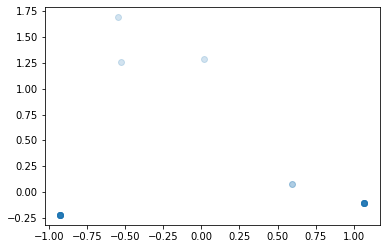

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = np.array(onehot_hl_li)

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1], alpha=.2)
plt.show()

可以把 點點名字印出來和下面的UPMG的名字作比較，然後自己猜看看是什麼

Q: What if we use several samples from different families?

# UPGMA

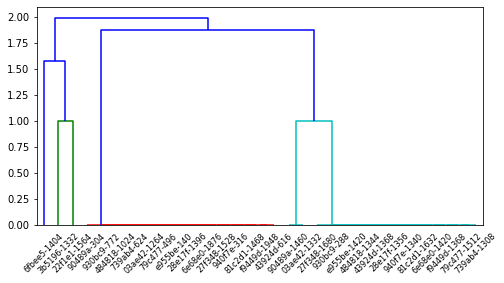

In [25]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(8,4))

X = np.array(onehot_hl_li)  #U 是 unweighted的意思
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

plt.show()

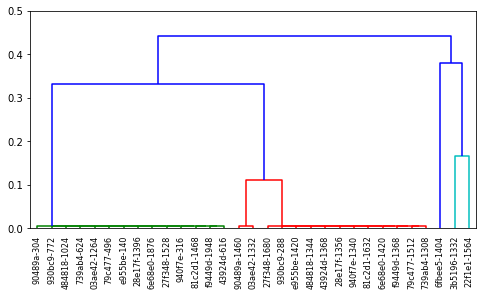

In [26]:
import scipy
import sklearn.metrics as sm 

plt.figure(figsize=(8,4))

X = np.array(onehot_hl_li)

# the double loop can be improved, how?
matrix = list()
for i in sn_list:
  li = list()
  for j in sn_list:
    i_ser = df.loc[i]
    j_ser = df.loc[j]

    _inter_ser = i_ser & j_ser
    _union_ser = i_ser | j_ser
    
    if sum(_union_ser) > 0:
      jaccard = round(sum(_inter_ser)/sum(_union_ser), 4)
      li.append(1.0 - jaccard)
    else:
      li.append(0.0)

  matrix.append(li)
# end of create distance matrix

D = scipy.spatial.distance.squareform(matrix)
Z = sch.linkage(D, method = 'weighted') # X is a 1d condensed distance matrix.
# hack Z
Z = [[z[0], z[1], 0.005 if z[2]==0 else z[2], z[3]] for z in Z] #把零變成 0.005是因為老師要讓他看得見
# end of hack Z
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top')

locs, labels = plt.xticks()
plt.setp(labels, rotation=90, fontsize=8)
plt.ylim(0.0, 0.5)
plt.show()



# DotMatrix

In [0]:
def createDotMatrix(hl):
  n = len(hl)

  x = hl.li
  y = hl.li

  matched = [[0 for j in range(n)] for i in range(n)]
  for i, t_api_x in enumerate(x):
    for j, t_api_y in enumerate(y):
      if hl.par == True:
        api_x = t_api_x[1] + t_api_x[2]
        api_y = t_api_y[1] + t_api_y[2]
      else:
        api_x = t_api_x[1]
        api_y = t_api_y[1]
      if api_x == api_y:
        matched[j][i] = 1.0

  return matched

In [0]:
hl = hl_list[0]
matched = createDotMatrix(hl)

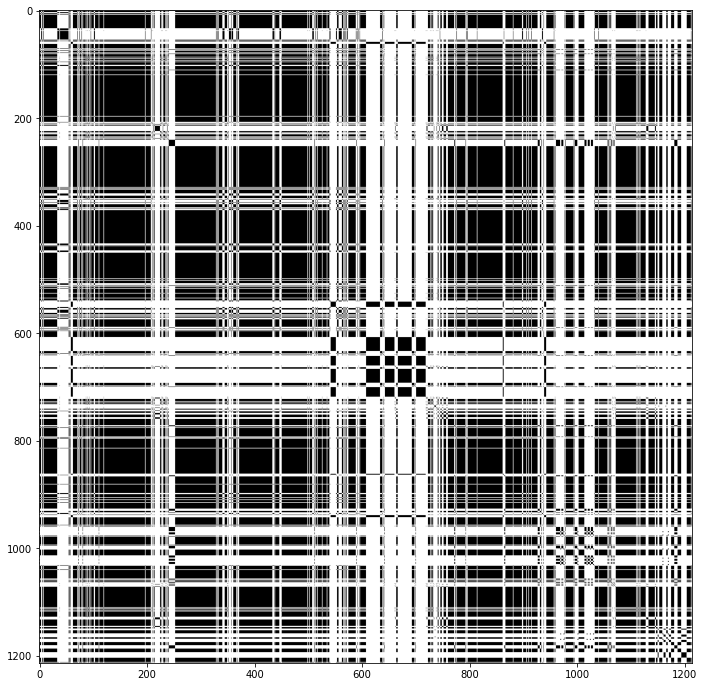

In [29]:
plt.figure(figsize=(12,12))
plt.imshow(matched, cmap='Greys')
plt.show()

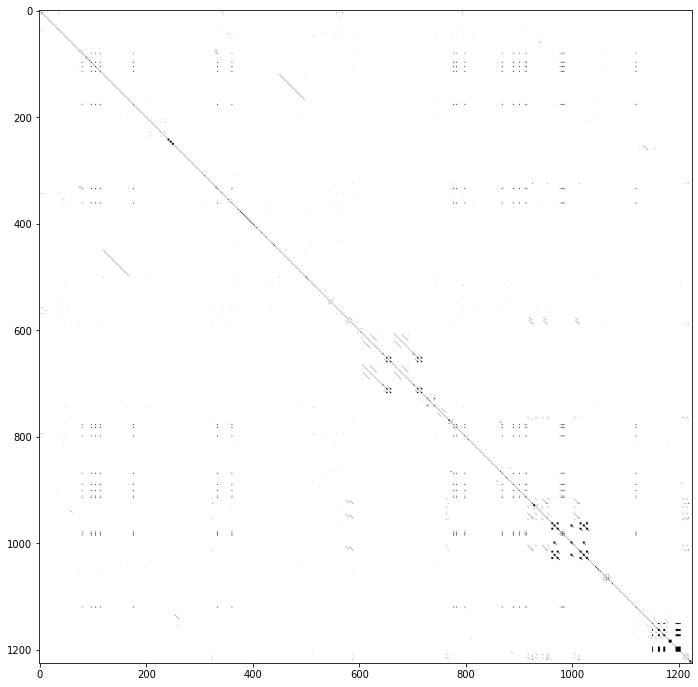

In [30]:
# parametered hooklog

par_hl = Hooklog("/content/morstar/03ae42959b733f11a168e268_1264.trace.hooklog", True)
matched = createDotMatrix(par_hl)

plt.figure(figsize=(12,12))
plt.imshow(matched, cmap='Greys')
plt.show()

當看到正方形出現時 是連續的code 序列， 正方形也可以不出現在對角線，但如果出現了在對稱位置也會有一個是正方形也同樣都是一樣的code序列

In [0]:
# Two hooklogs

def createPairDotMatrix(h1, h2):
  n = len(h1)
  m = len(h2)

  x = h1.li
  y = h2.li

  matched = [[0 for j in range(n)] for i in range(m)]
  for i, t_api_x in enumerate(x):
    for j, t_api_y in enumerate(y):
      if h1.par ==True and h2.par == True:
        api_x = t_api_x[1] + t_api_x[2]
        api_y = t_api_y[1] + t_api_y[2]
      else:
        api_x = t_api_x[1]
        api_y = t_api_y[1]
      if api_x == api_y:
        matched[j][i] = 1.0

  return matched

class Hooklog: /content/morstar/03ae42959b733f11a168e268_1332.trace.hooklog, par = True, len = 418, digit name = 03ae42-1332
class Hooklog: /content/morstar/22f1e10e563130d67bb55961a7271447_1564.trace.hooklog, par = True, len = 423, digit name = 22f1e1-1564


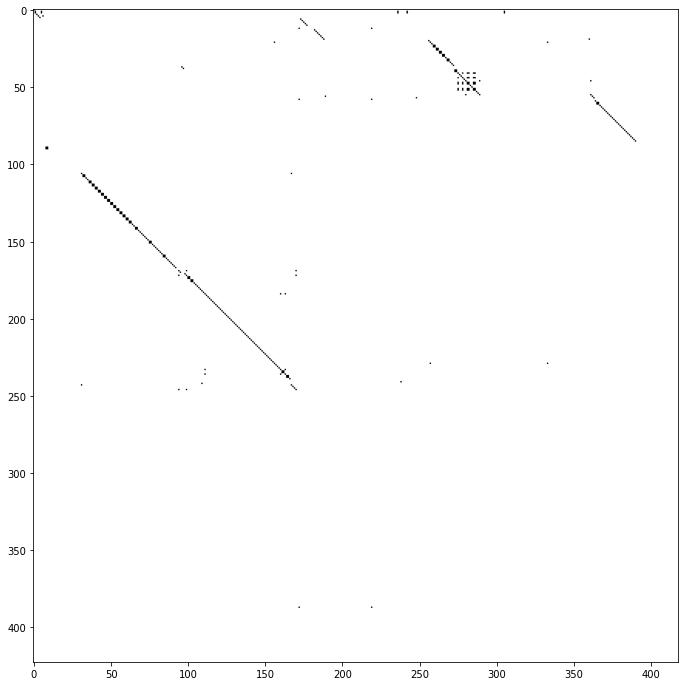

In [32]:
# two parametered hooklog

par_h1 = Hooklog("/content/morstar/03ae42959b733f11a168e268_1332.trace.hooklog", True)
par_h2 = Hooklog("/content/morstar/22f1e10e563130d67bb55961a7271447_1564.trace.hooklog", True)
print(par_h1)
print(par_h2)

pair_matched = createPairDotMatrix(par_h1, par_h2)

plt.figure(figsize=(12,12))
plt.imshow(pair_matched, cmap='Greys')
plt.show()

Q: Could you do two-gram dotmatrix?

# Alignment

 global alignment 
 local alignment
 對我們來說沒差別